<a href="https://colab.research.google.com/github/Jaydenzk/DS-Unit-2-Applied-Modeling/blob/master/module1/assignment_applied_modeling_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Applied Modeling, Module 1

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Choose which observations you will use to train, validate, and test your model. And which observations, if any, to exclude.
- [ ] Determine whether your problem is regression or classification.
- [ ] Choose your evaluation metric.
- [ ] Begin with baselines: majority class baseline for classification, or mean baseline for regression, with your metric of choice.
- [ ] Begin to clean and explore your data.
- [ ] Choose which features, if any, to exclude. Would some features "leak" information from the future?

## Reading
- [Attacking discrimination with smarter machine learning](https://research.google.com/bigpicture/attacking-discrimination-in-ml/), by Google Research, with  interactive visualizations. _"A threshold classifier essentially makes a yes/no decision, putting things in one category or another. We look at how these classifiers work, ways they can potentially be unfair, and how you might turn an unfair classifier into a fairer one. As an illustrative example, we focus on loan granting scenarios where a bank may grant or deny a loan based on a single, automatically computed number such as a credit score."_
- [How Shopify Capital Uses Quantile Regression To Help Merchants Succeed](https://engineering.shopify.com/blogs/engineering/how-shopify-uses-machine-learning-to-help-our-merchants-grow-their-business)
- [Maximizing Scarce Maintenance Resources with Data: Applying predictive modeling, precision at k, and clustering to optimize impact](https://towardsdatascience.com/maximizing-scarce-maintenance-resources-with-data-8f3491133050), **by Lambda DS3 student** Michael Brady. His blog post extends the Tanzania Waterpumps scenario, far beyond what's in the lecture notebook.
- [Notebook about how to calculate expected value from a confusion matrix by treating it as a cost-benefit matrix](https://github.com/podopie/DAT18NYC/blob/master/classes/13-expected_value_cost_benefit_analysis.ipynb)
- [Simple guide to confusion matrix terminology](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/) by Kevin Markham, with video
- [Visualizing Machine Learning Thresholds to Make Better Business Decisions](https://blog.insightdatascience.com/visualizing-machine-learning-thresholds-to-make-better-business-decisions-4ab07f823415)

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Video_Games_Sales_as_at_22_Dec_2016.csv to Video_Games_Sales_as_at_22_Dec_2016.csv


In [17]:
import os, sys
in_colab = 'google.colab' in sys.modules

if in_colab:
    # Install required python package:
    # category_encoders, version >= 2.0
    !pip install --upgrade category_encoders

     |████████████████████████████████| 92kB 3.3MB/s 


In [18]:
!pip install eli5

     |████████████████████████████████| 112kB 2.7MB/s 


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

In [3]:
df.shape

(16719, 16)

In [4]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [5]:
df.Platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [6]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
## Keep columns's name simple form

df = df.rename(columns={"Year_of_Release": "Year", "NA_Sales": "NA", "EU_Sales": "EU", "JP_Sales": "JP", "Other_Sales": "Other", "Global_Sales": "Global"})
df = df[df["Year"].notnull()]
df = df[df["Genre"].notnull()]
df["Year"] = df["Year"].apply(int)

In [8]:
df = df[(df['Platform'] == 'X360') | (df['Platform'] == 'PC')]

#Let's double check the value counts to be sure
print(pd.value_counts(df["Platform"]))

#Let's see the shape of the data again
print(df.shape)

X360    1232
PC       957
Name: Platform, dtype: int64
(2189, 16)


In [0]:
## platforms = {"Playstation" : ["PS", "PS2", "PS3", "PS4"],
##             "Xbox" : ["XB", "X360", "XOne"], 
##             "PC" : ["PC"],
##             "Nintendo" : ["Wii", "WiiU"],
##             "Portable" : ["GB", "GBA", "GC", "DS", "3DS", "PSP", "PSV"]}

In [9]:
from sklearn.model_selection import train_test_split

# Split into train & test sets first

X_train, X_test = train_test_split(df, train_size=0.8, test_size=0.2, 
                                  stratify=df['Platform'], random_state=42)

# Split X_train into train and val sets

X_train, X_val = train_test_split(X_train, train_size=0.8, test_size=0.2, 
                                 stratify=X_train['Platform'], random_state=42)

# Target is Platform on each features

target = 'Platform'
y_train = X_train[target]
y_val = X_val[target]
y_test = X_test[target]

X_train = X_train.drop(columns=target)
X_val = X_val.drop(columns=target)
X_test = X_test.drop(columns=target)


X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((1400, 15), (1400,), (351, 15), (351,), (438, 15), (438,))

In [10]:
print('Train:\n', y_train.value_counts(normalize=True))
print('Validation:\n', y_val.value_counts(normalize=True))
print('Test:\n', y_test.value_counts(normalize=True))

Train:
 X360    0.562857
PC      0.437143
Name: Platform, dtype: float64
Validation:
 X360    0.561254
PC      0.438746
Name: Platform, dtype: float64
Test:
 X360    0.563927
PC      0.436073
Name: Platform, dtype: float64


In [11]:
# Normalize y_train

y_train.value_counts(normalize=True)

X360    0.562857
PC      0.437143
Name: Platform, dtype: float64

In [12]:
# Accuracy Score

from sklearn.metrics import accuracy_score

majority = y_train.mode()[0]
maj_pred = [majority] * len(y_train)
accuracy_score(y_train, maj_pred)

0.5628571428571428

In [13]:
Global = 'Global'
numeric = X_train.select_dtypes('number').columns.drop(Global).tolist()

for col in numeric:
    X_train[col] = X_train[col].astype('object')

print(X_train.shape)
X_train.dtypes

(1400, 15)


Name             object
Year             object
Genre            object
Publisher        object
NA               object
EU               object
JP               object
Other            object
Global          float64
Critic_Score     object
Critic_Count     object
User_Score       object
User_Count       object
Developer        object
Rating           object
dtype: object

In [14]:
for col in numeric:
    X_val[col] = X_val[col].astype('object')

print(X_val.shape)

(351, 15)


In [15]:
for col in numeric:
    X_test[col] = X_test[col].astype('object')

print(X_test.shape)

(438, 15)


In [19]:
#Random Forest

import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

# Create ML pipeline
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(), 
    RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
)

# Fit to train
pipeline.fit(X_train, y_train)

# Score on val
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.8376068376068376


In [23]:
# XGboost

from xgboost import XGBClassifier

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

# fit on train, score on val
pipeline.fit(X_train, y_train)

print('Validation Accuracy: ', pipeline.score(X_val, y_val))

Validation Accuracy:  0.8376068376068376


In [24]:
# Let's do a permutation importance to see the most important features
# Rerun the random forest classifier outside the pipeline

transformers = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer()
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [25]:
# Let's do eli5 to see which columns to use

import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    model, scoring='accuracy', n_iter=2, random_state=42
)

permuter.fit(X_val_transformed, y_val)
feature_names = X_val.columns.tolist()
eli5.show_weights(
    permuter, 
    top=None,  # show the permutation importances for all features
    feature_names=feature_names
)

Using TensorFlow backend.


Weight,Feature
0.1040 ± 0.0598,NA
0.0812 ± 0.0142,JP
0.0627 ± 0.0057,Global
0.0442 ± 0.0028,Genre
0.0157 ± 0.0028,Other
0.0057 ± 0.0114,EU
0.0043 ± 0.0028,Year
0.0028 ± 0.0057,Publisher
0.0028 ± 0.0057,Name
0.0014 ± 0.0028,Developer


In [31]:
from sklearn.metrics import classification_report

# Calculate y_pred
y_pred = pipeline.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

          PC       0.82      0.81      0.81       154
        X360       0.85      0.86      0.86       197

    accuracy                           0.84       351
   macro avg       0.84      0.83      0.83       351
weighted avg       0.84      0.84      0.84       351



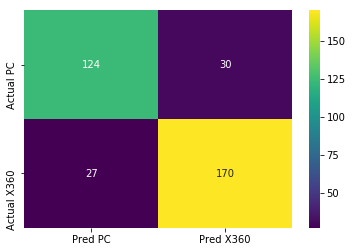

In [30]:
# Let's see the heatmap

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Pred {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), 
                         columns=columns, index=index)
    return sns.heatmap(table, annot=True, fmt='.0f', cmap='viridis')

plot_confusion_matrix(y_val, y_pred);

[0.21 0.81 0.05 0.68 0.05 0.85 0.23 0.19 0.88 0.22 0.11 0.94 0.83 0.53
 0.09 0.94 0.39 0.85 0.84 0.15 0.69 0.29 0.62 0.07 0.39 0.14 0.69 0.88
 0.78 0.02 0.13 0.79 0.79 0.82 0.82 0.12 0.85 0.   0.8  0.27 0.59 0.91
 0.79 0.05 0.24 0.76 0.87 0.03 0.16 0.15 0.16 0.19 0.16 0.65 0.98 0.81
 0.9  0.14 0.9  0.88 0.11 0.94 0.37 0.77 0.04 0.34 0.8  0.7  0.9  0.82
 0.97 1.   0.89 0.15 0.24 0.79 0.66 0.62 0.29 0.15 0.18 0.78 0.15 0.21
 0.58 0.74 0.22 0.88 0.66 0.36 0.66 0.09 0.83 0.36 0.12 0.16 0.27 0.57
 0.08 0.47 0.25 0.6  0.78 0.91 0.87 0.22 0.94 0.63 0.11 0.82 0.95 0.03
 0.92 0.79 0.98 0.8  0.72 0.25 0.01 0.98 0.1  0.86 0.89 0.69 0.8  0.69
 0.94 0.06 0.76 0.9  0.3  0.58 0.48 0.4  0.76 0.9  0.78 0.59 0.72 0.2
 0.72 0.04 0.69 0.61 0.93 0.09 0.79 0.88 0.05 0.8  0.88 0.24 0.2  0.19
 0.71 0.51 0.59 0.12 0.59 0.23 0.73 0.31 0.68 0.46 0.63 0.15 0.9  0.88
 0.15 0.08 0.29 0.88 0.22 0.16 0.3  0.26 0.83 0.93 0.72 0.91 0.92 0.91
 0.85 0.96 0.16 0.94 0.32 0.58 0.47 0.17 0.76 0.85 0.06 0.72 0.77 0.81
 0.02 0

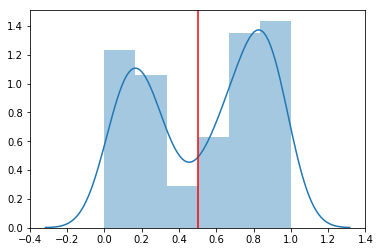

In [37]:
y_pred_proba = pipeline.predict_proba(X_val)[:,1]
print(y_pred_proba)

threshold = 0.5
ax = sns.distplot(y_pred_proba)
ax.axvline(threshold, color='red');

In [60]:
# confusion matrix for majority baseline

majority_class = y_train.mode()[0]
y_pred = np.full_like(y_val, fill_value=majority_class)
accuracy_score(y_val, y_pred)

0.5612535612535613

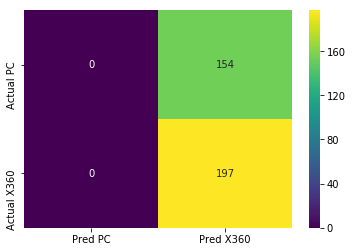

In [47]:
plot_confusion_matrix(y_val, y_pred);

In [48]:
#ROC AUC

from sklearn.metrics import roc_auc_score

y_pred_proba = pipeline.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred_proba)

0.8927747379524029

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/ranking.py:659: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


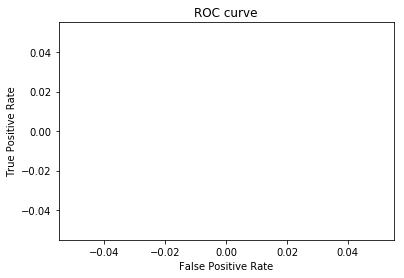

In [49]:
fpr, tpr, thresholds = roc_curve(y_val=='M', y_pred_proba)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

In [0]:
from yellowbrick.classifier import ClassPredictionError

# Classes assign
classes = ['X360', 'PC']

# Encode X_train & X_val
encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

# Impute
imputer = SimpleImputer()
X_train_imputed = imputer.fit_transform(X_train_encoded)
X_val_imputed = imputer.transform(X_val_encoded)

visualizer = ClassPredictionError(
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1), 
    classes=classes
)

In [73]:
# Partial Dependence
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Fit model
model.fit(X_train_imputed, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [63]:
!pip install pdpbox

     |████████████████████████████████| 57.7MB 1.5MB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.0-cp36-none-any.whl size=57690723 sha256=dd09fb1bf57b026225ef75eaf9b1fd1856cc8e564d36f7f0ecab9d58254a9f82
  Stored in directory: /root/.cache/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built pdpbox


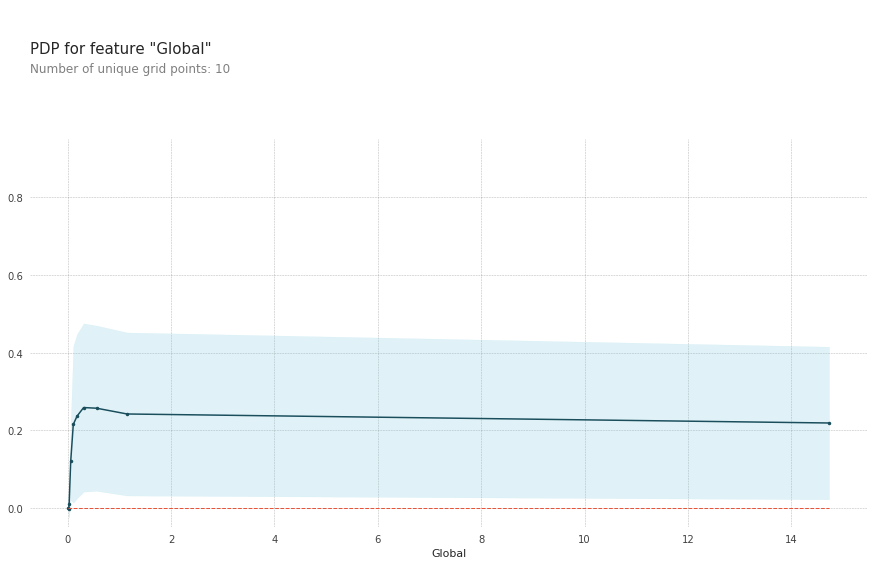

In [65]:
# Pdpbox feature for Global

%matplotlib inline
import matplotlib.pyplot as plt
from pdpbox import pdp

feature = 'Global'
features = X_train.columns.tolist()
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_train_encoded, model_features=features, feature=feature)
pdp.pdp_plot(pdp_dist, feature);

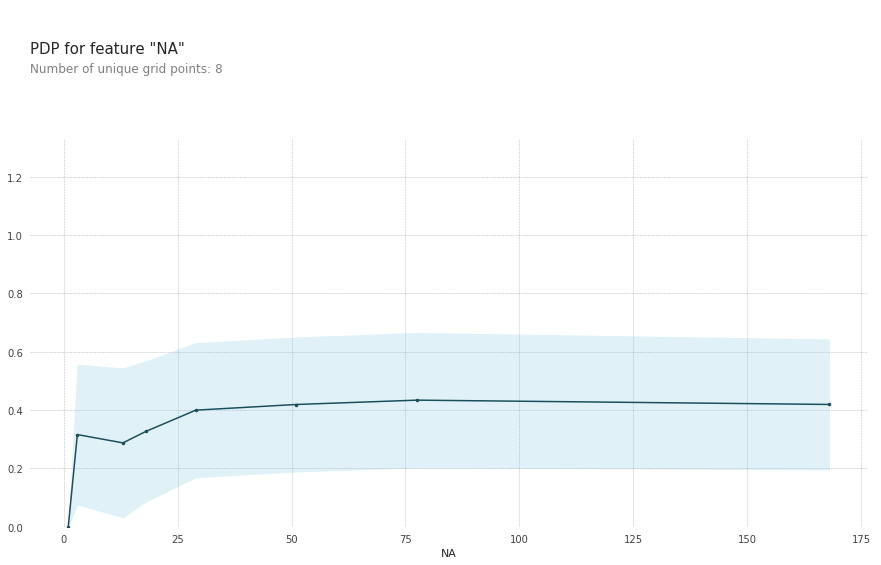

In [66]:
# Feature for NA

feature = 'NA'
features = X_train.columns.tolist()
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_train_encoded, model_features=features, feature=feature)
pdp.pdp_plot(pdp_dist, feature);

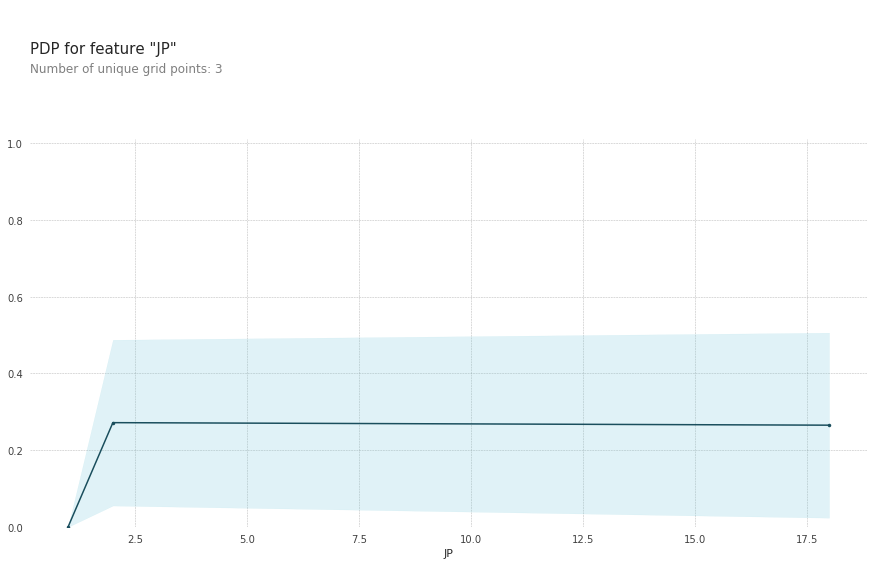

In [67]:
# Feature for JP

feature = 'JP'
features = X_train.columns.tolist()
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_train_encoded, model_features=features, feature=feature)
pdp.pdp_plot(pdp_dist, feature);

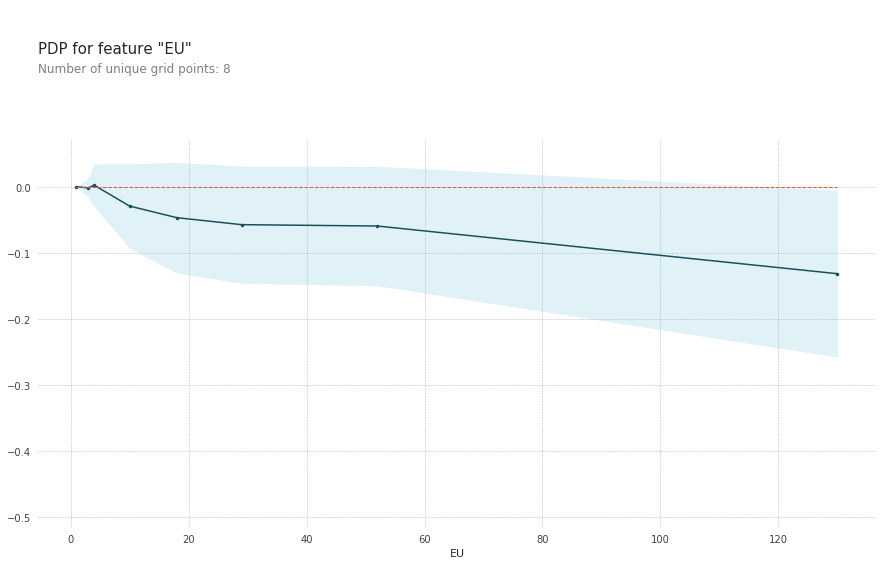

In [68]:
# Feature for EU

feature = 'EU'
features = X_train.columns.tolist()
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_train_encoded, model_features=features, feature=feature)
pdp.pdp_plot(pdp_dist, feature);

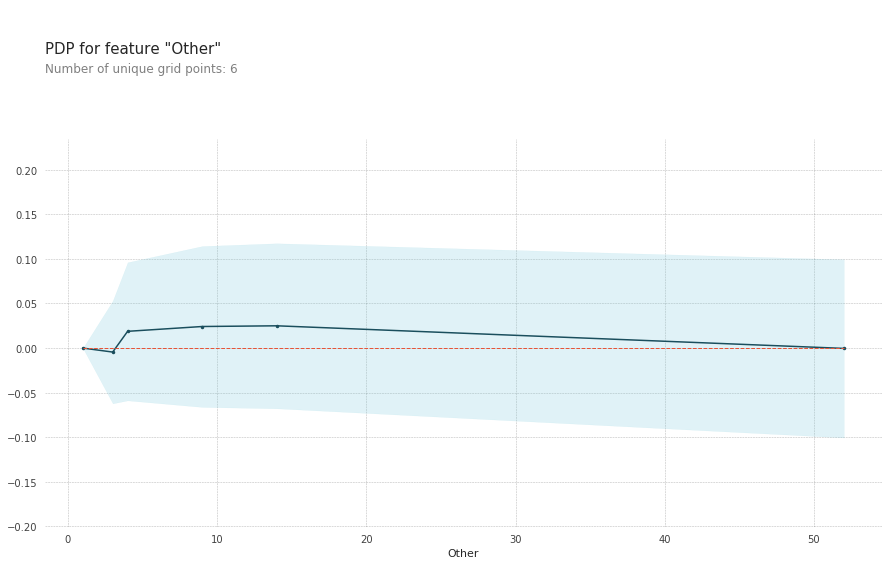

In [74]:
# Feature for Other

feature = 'Other'
features = X_train.columns.tolist()
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_train_encoded, model_features=features, feature=feature)
pdp.pdp_plot(pdp_dist, feature);